In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning


In [7]:
# Drop any duplicates
df.drop_duplicates()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


###  Check for nulls

In [8]:
df.notnull().sum().sort_values()
# There are no columns with null values

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

### Drop unique columns

In [9]:
def find_cols_with_all_unique():
    cols_unqiue_values = (df.select_dtypes('int').apply(pd.Series.nunique, axis = 0) == len(df.index))
    # Drop coulmns with all unique values
    print(cols_unqiue_values)        

find_cols_with_all_unique()

df.drop(['instant'], axis=1, inplace=True)

instant        True
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
casual        False
registered    False
cnt           False
dtype: bool


In [10]:
df.dteday =  pd.to_datetime(df.dteday)
df['dteday_year'] = pd.to_datetime(df.dteday).dt.year
# we can drop dteday now as we have months column and year column has been newly introduced
df.drop(['dteday'], axis=1, inplace=True)


### Visualize numeric variables

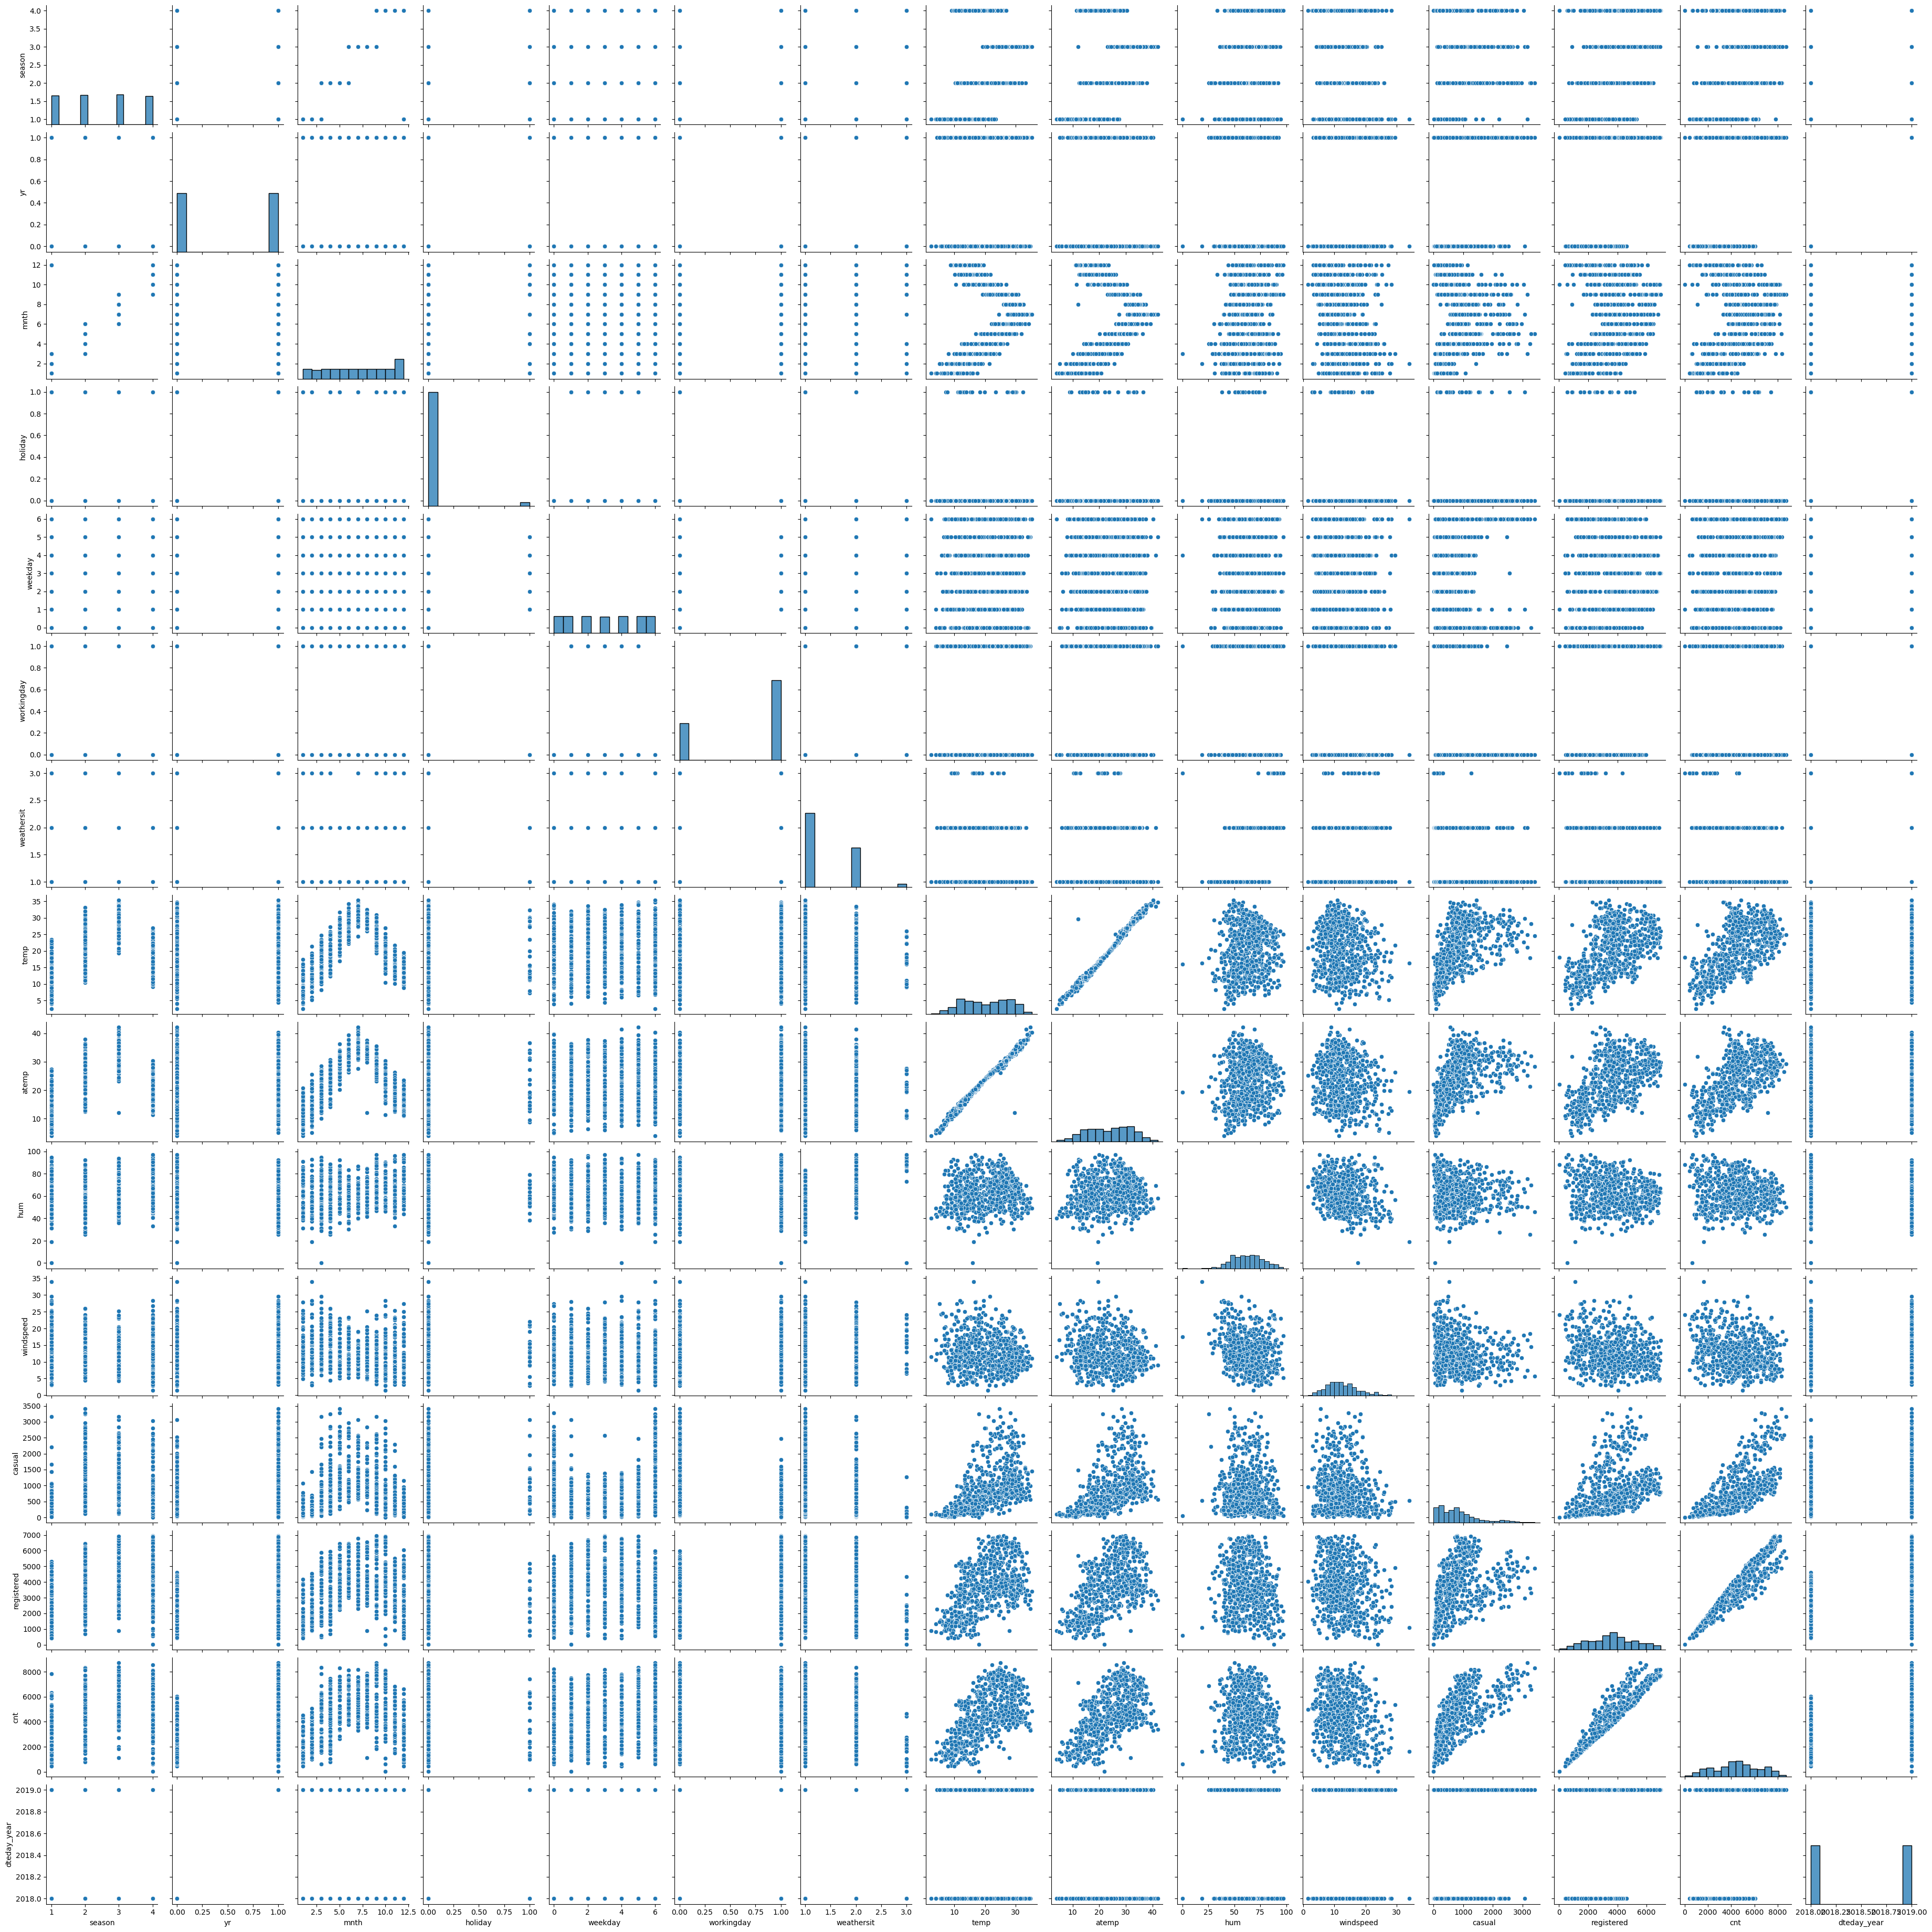

In [11]:
sns.pairplot(df)
plt.show()

**Observations**
1. People seem to take lesser bike rentals in spring season
2. There seems to have been significant rise in total rentals from 2018 to 2019
3. People dont seem to prefer to take rentals on holidays when compared with non-holidays
4. Clear and misty seems to have similar number of total rentals but there is a significant decrease in total rentals if it's a Light snowy day or a day with heavy rains
5. There seems to be some sort of linear relationship between atemp, temp and cnt target variable. 

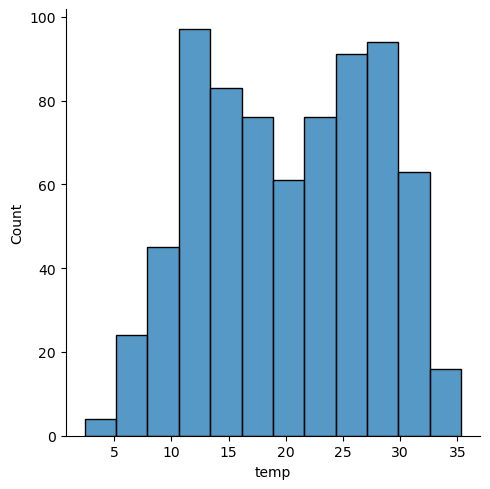

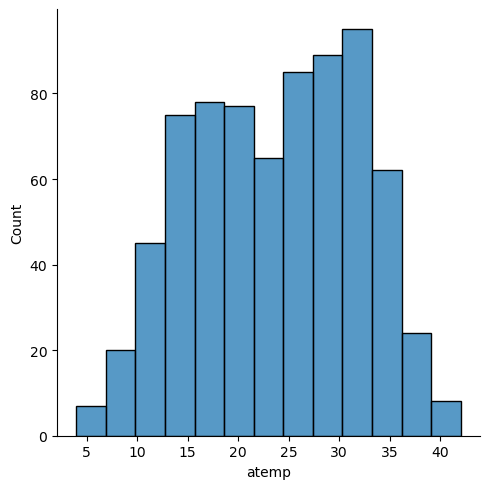

In [12]:
sns.displot(x='temp', data = df)
sns.displot(x="atemp", data=df)

* On most days Temperature seems to lie between 10 and 30 celsius 
* On most days feeling Temperature seems to lie between 15 and 35 celsius 

### Data preparation

In [13]:
# Convert Weather into categorical variable
def conv_weathersit(x):
    return x.map({1: "clear", 2: "misty", 3: "snowy", 4: "rainy"})

df[['weathersit']] = df[['weathersit']].apply(conv_weathersit)

In [14]:
# Convert season into categorical variable
def conv_season(x):
    return x.map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

df[['season']] = df[['season']].apply(conv_season)

In [15]:
# Convert months into categorical variable
def conv_mnth(x):
    return x.map({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})

df[['mnth']] = df[['mnth']].apply(conv_mnth)

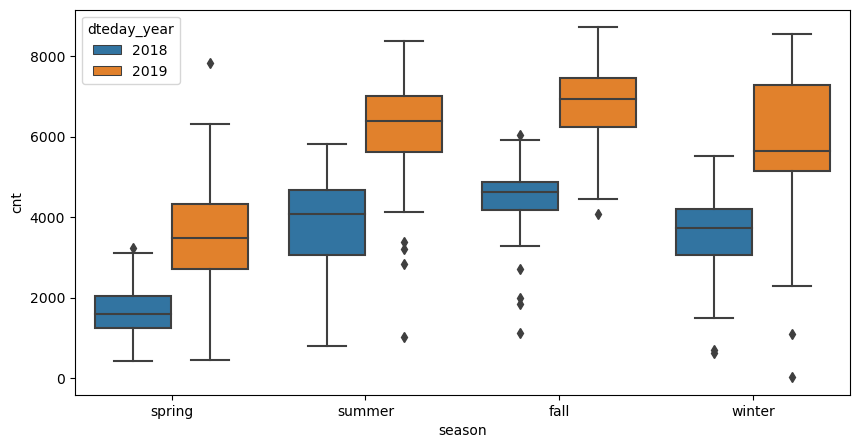

In [16]:
### Plot Categorical variables season against cnt
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'dteday_year', data = df)
plt.show()

* Except Spring, All other seasons like Summer, fall and winter seems to experience similar number of total bike riders
* There has been an increase in total bike riders from 2018 to 2019 across all seasons

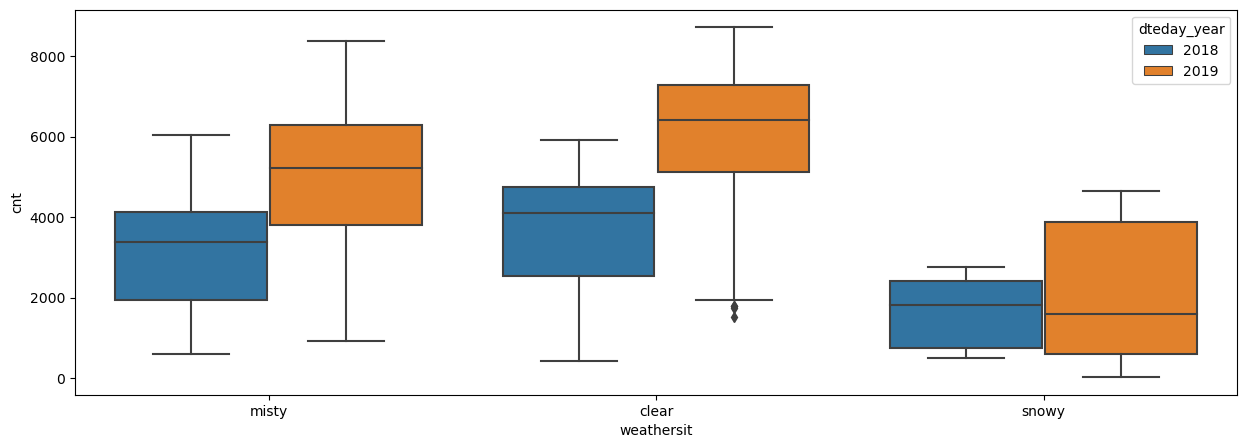

In [17]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'dteday_year', data = df)
plt.show()

* Snowy experiences the least amount of rentals followed by misty days
* Clear weather experience most amount of total rentals in a day

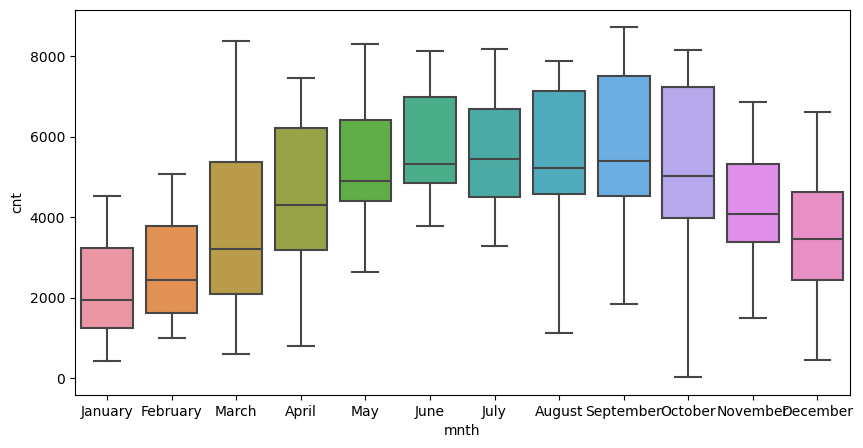

In [18]:
### Plot Categorical variables mnth against cnt
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

* Months like May, June, July, August, September, October exprience relatively similar and higher number of bike rentals than other months
* There is a **sudden peak in the 50% percentile of bike rentals from March to April**  and a **sudden drop in the 50% percentile of bike rentals from March to April** 

In [19]:
# Convert weekday into categorical variable
def conv_weekday(x):
    return x.map({0: "sunday", 1: "monday", 2: "tuesday", 3: "wednesday", 4: "thursday", 5: "friday", 6: "saturday"})

df[['weekday']] = df[['weekday']].apply(conv_weekday)

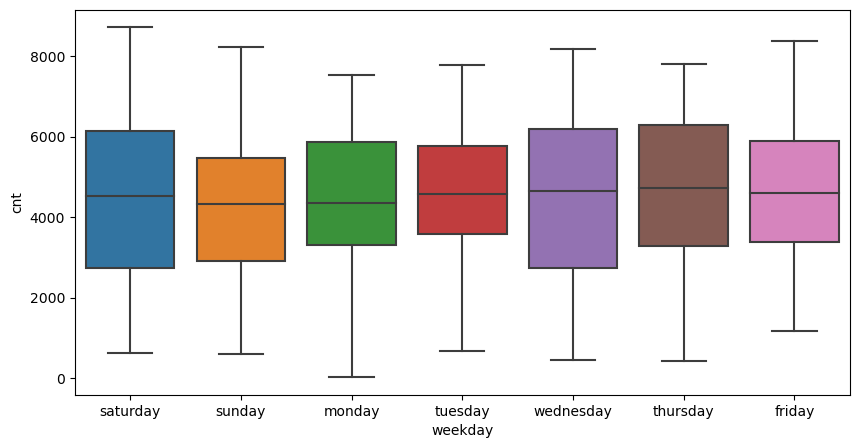

In [20]:
### Plot Categorical variables
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.show()

* On almost all weekdays in 50% of cases roughly ~4500 rentals is expected
* Saturday, wednesday and thursday have larger spread of people(25-75 percentile) taking rentals than other weekdays

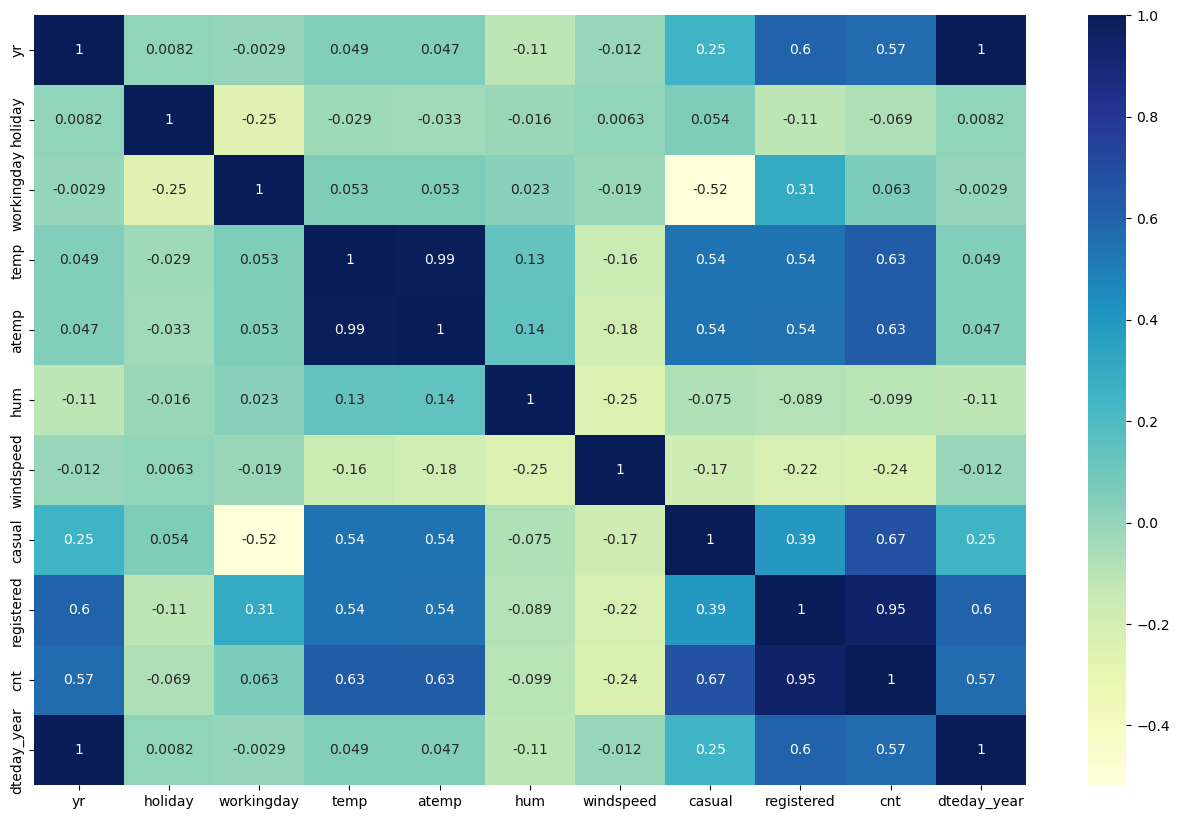

In [21]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

* cnt seems to highest correlation with temp and atemp
* As the target variable is cnt and there cnt is a combination of registered and casual they would be not useful in model building 
* There is high inter-correlation between atemp and temp, so we can drop one of those columns

In [22]:
df.drop(['registered', 'casual', 'atemp'], axis=1, inplace=True)

### Create Dummy variables

In [23]:
# Create dummy variables
cols_dummies = pd.get_dummies(df[['weekday', 'season', 'weathersit', 'mnth']], drop_first = True)
df = pd.concat([df, cols_dummies], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,spring,0,January,0,saturday,0,misty,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,January,0,sunday,0,misty,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,January,0,monday,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,tuesday,1,clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,January,0,wednesday,1,clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


### Drop Columns fro which dummies are created

In [24]:
# Drop columns for which dummies are already created
df.drop(['weekday', 'season', 'weathersit', 'mnth'], axis=1, inplace=True)

In [25]:
df.drop(['dteday_year'], axis=1, inplace=True)

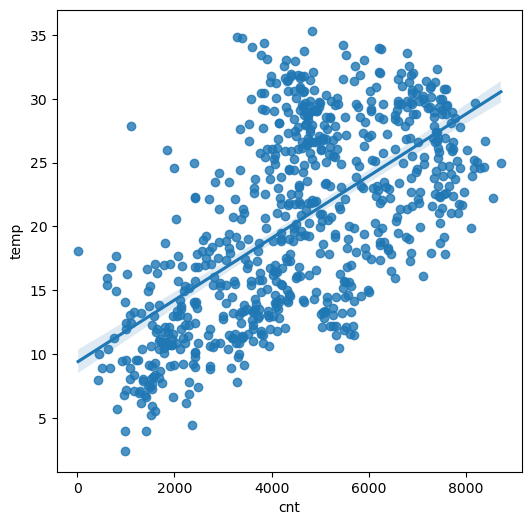

In [26]:
# As there is high correlation between temp and cnt variable, 
# Picking temp as the first variable and we'll try to fit a regression to that
plt.figure(figsize=[6,6])
sns.regplot(x = df.cnt, y=df.temp, data=df)
plt.show()

## Building a linear model

### Divide dataset into test and training set

In [27]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescale continous variables

In [28]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['windspeed', 'hum', 'temp', 'cnt']

scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_monday,weekday_saturday,weekday_sunday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_monday,weekday_saturday,weekday_sunday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.150980,0.154902,0.143137,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.358381,0.362166,0.350557,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

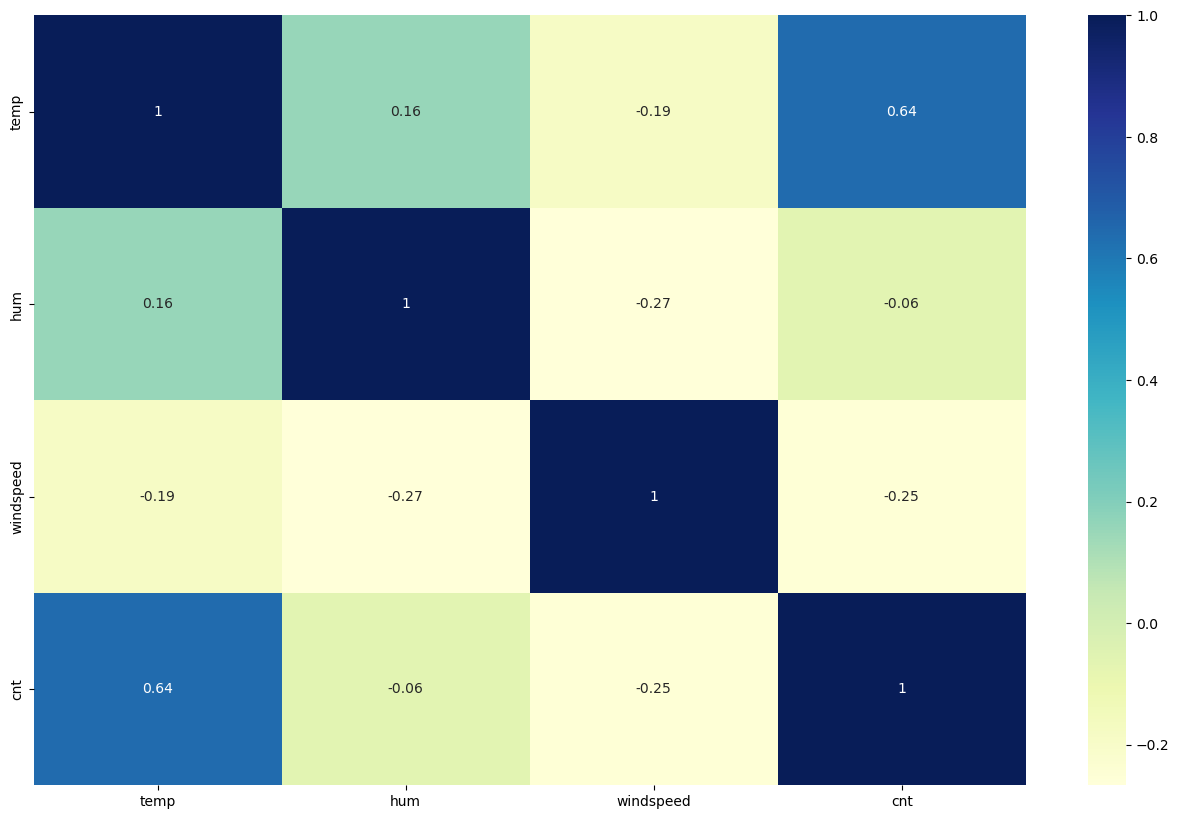

In [31]:
cor=df_train[['temp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize = (16, 10))
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

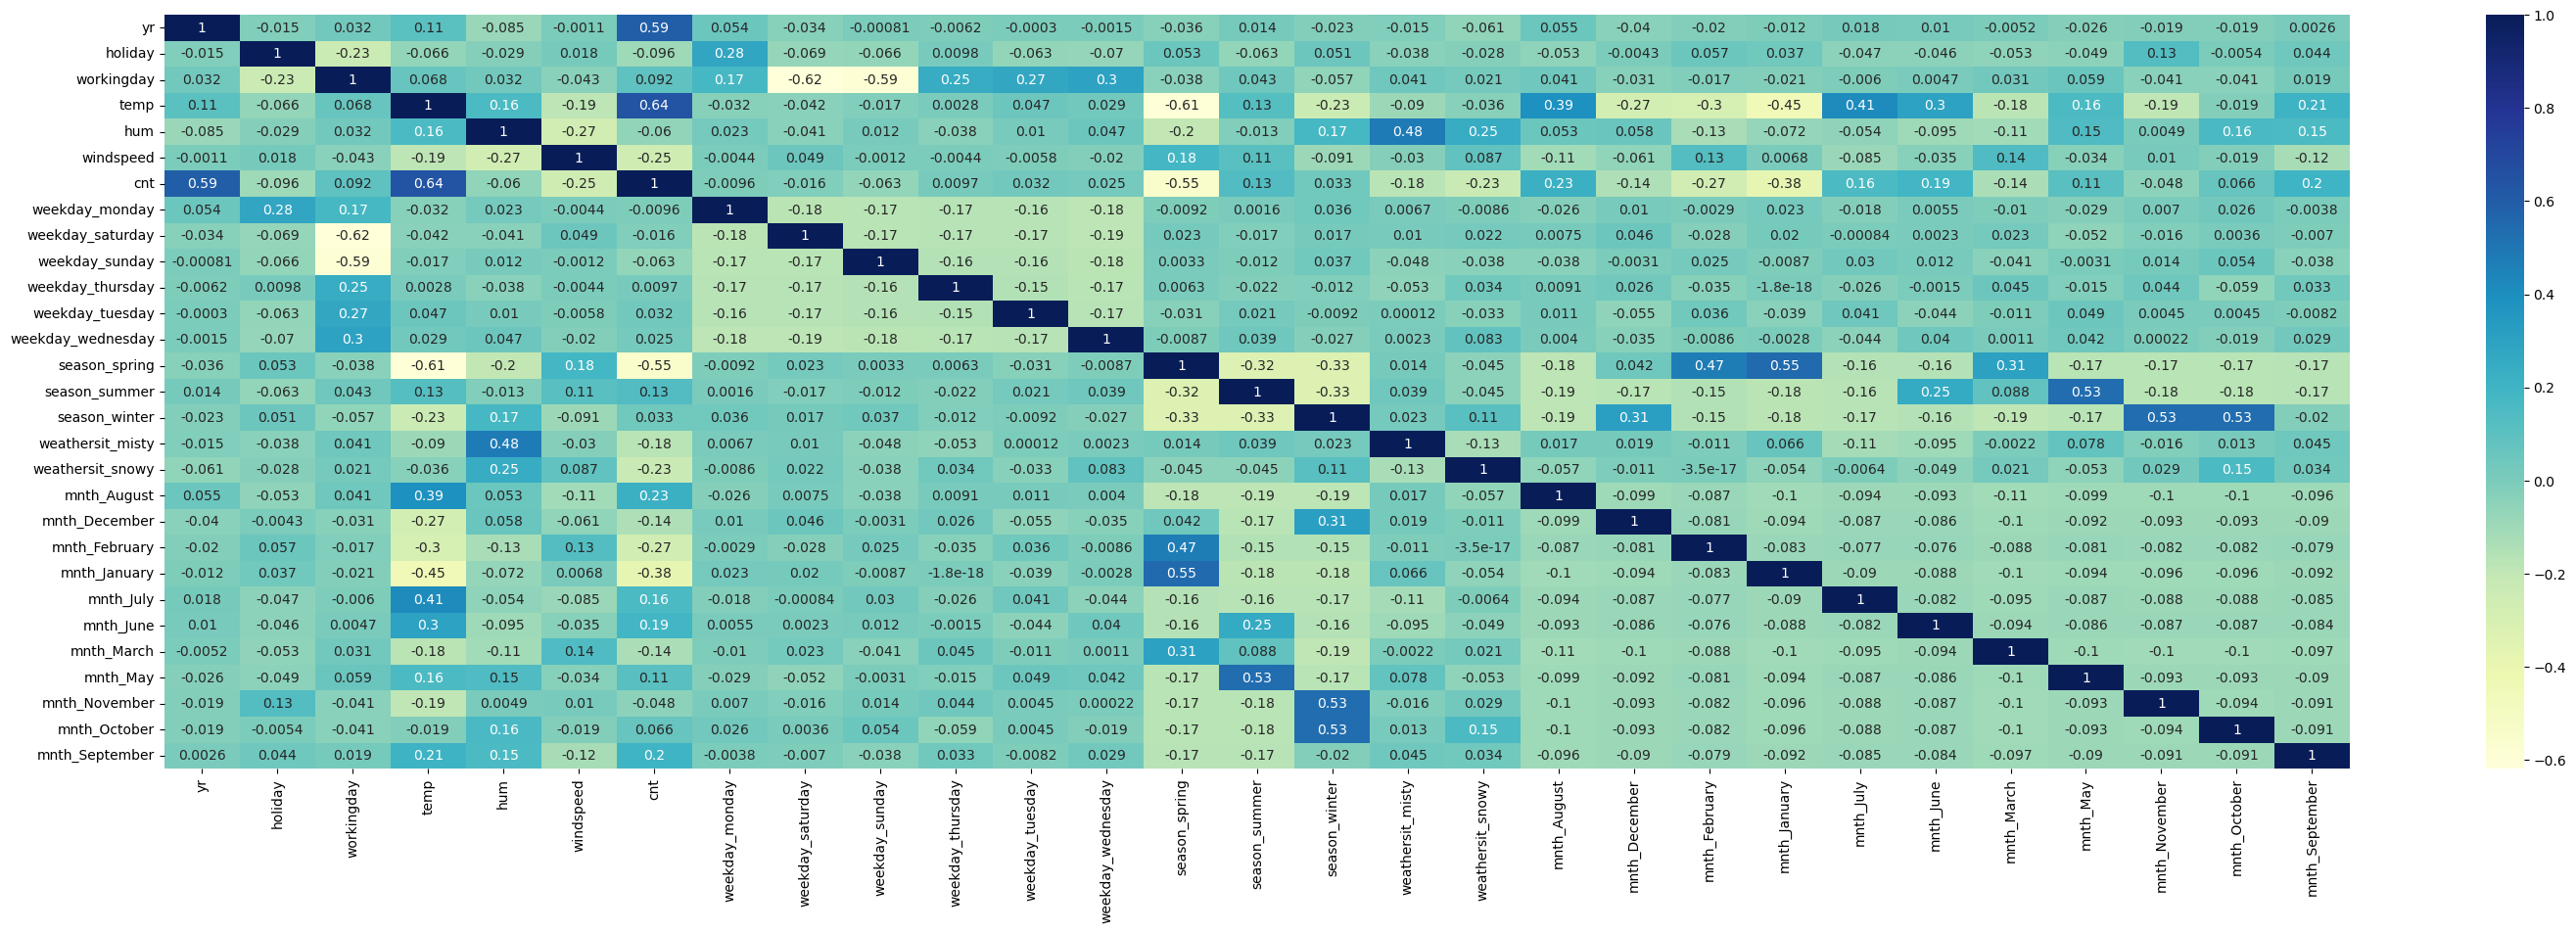

In [32]:
plt.figure(figsize = (36, 10))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

In [35]:
# Create a frst fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const    0.169798
temp     0.639952
dtype: float64

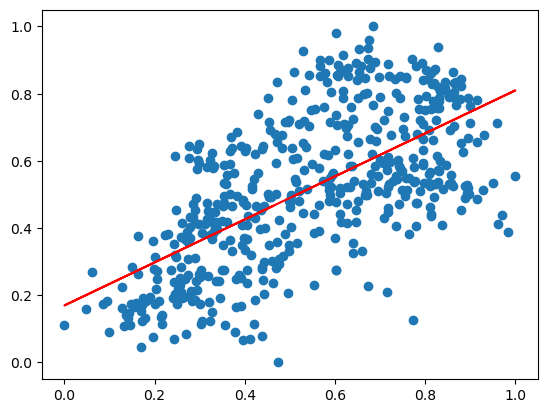

In [36]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 + 0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [37]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           5.80e-61
Time:                        16:01:25   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

* As the p-value is very low of temp variable, It can be considered significant
* Ajusted R-squared value is 0.413, will try to improve by adding another variable

In [38]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp', 'windspeed']])

In [39]:
# Create a frst fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        0.242192
temp         0.614225
windspeed   -0.182599
dtype: float64

In [40]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     193.2
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           4.26e-63
Time:                        16:01:25   Log-Likelihood:                 182.97
No. Observations:                 510   AIC:                            -359.9
Df Residuals:                     507   BIC:                            -347.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2422      0.026      9.188      0.0

* Although p-value of windspeed is very low, There is a very minor increase in value of adjusted R-squared after adding windspeed

### Lets try **bottom-up approach** by adding all the feature variables and remove the ones that are **not significant** for the model and have **high variance**

In [41]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          8.74e-182
Time:                        16:01:25   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2451      0.035      6.955      0.000       0.176       0.314
yr                    0.2321      0.008     28.820      0.000       0.216       0.248
holiday               0.0100      0.024      0.415      0.678      -0.037       0.057
workingday            0.0969      0.012      7.905      0.000       0.073       0.121
temp                  0.4506      0.046      9.734      0.000       0.360       0.542
hum                  -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed            -0.1865      0.026     -7.257      0.000      -0.237      -0.136
weekday_monday       -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_saturday      0.0964      0.014      7.029      0.000       0.069       0.123
weekday_sunday        0.0419      0.014      3.006      0.003       0.014       0.069
weekday_thursday     -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_tuesday      -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_wednesday    -0.0054      0.015     -0.362      0.718      -0.035       0.024
season_spring        -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer         0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter         0.1058      0.028      3.794      0.000       0.051       0.161
weathersit_misty     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_snowy     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
mnth_August           0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_December        -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_February        -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_January         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_July            -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_June            -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_March            0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May              0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_November        -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_October          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_September        0.0811      0.032      2.533      0.012       0.018       0.144
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:      

In [42]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,workingday,85.58
7,weekday_saturday,19.72
8,weekday_sunday,18.35
12,season_spring,10.79
14,season_winter,9.50
13,season_summer,8.29
3,temp,7.12
25,mnth_November,6.80
26,mnth_October,6.59
17,mnth_August,6.43


In [43]:
df_train.columns
# Drop columns which has high insignificance and high variance
# X = X_train.drop(['holiday', 'weekday_thursday', 'weekday_wednesday', 'mnth_August', 
#                   'mnth_February', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October'], 1,)
X_train_2 = X_train.drop(['mnth_August', 'mnth_July', 'mnth_October', 'mnth_November' , 'mnth_December'], 1,)


In [44]:
X_train_2_lm = sm.add_constant(X_train_2)
lr_2 = sm.OLS(y_train, X_train_2_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.4
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          3.73e-183
Time:                        16:01:26   Log-Likelihood:                 518.65
No. Observations:                 510   AIC:                            -991.3
Df Residuals:                     487   BIC:                            -893.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2114      0.030      7.145      0.000       0.153       0.270
yr                    0.2323      0.008     28.585      0.000       0.216       0.248
holiday              -0.0018      0.023     -0.078      0.938      -0.048       0.044
workingday            0.0899      0.011      7.832      0.000       0.067       0.112
temp                  0.4858      0.038     12.903      0.000       0.412       0.560
hum                  -0.1499      0.038     -3.923      0.000      -0.225      -0.075
windspeed            -0.1822      0.026     -7.050      0.000      -0.233      -0.131
weekday_monday       -0.0207      0.016     -1.336      0.182      -0.051       0.010
weekday_saturday      0.0888      0.013      6.919      0.000       0.064       0.114
weekday_sunday        0.0345      0.013      2.582      0.010       0.008       0.061
weekday_thursday     -0.0113      0.016     -0.721      0.472      -0.042       0.019
weekday_tuesday      -0.0196      0.016     -1.249      0.212      -0.050       0.011
weekday_wednesday    -0.0054      0.015     -0.356      0.722      -0.035       0.024
season_spring        -0.0517      0.025     -2.050      0.041      -0.101      -0.002
season_summer         0.0516      0.018      2.914      0.004       0.017       0.086
season_winter         0.1043      0.017      5.994      0.000       0.070       0.139
weathersit_misty     -0.0587      0.011     -5.583      0.000      -0.079      -0.038
weathersit_snowy     -0.2524      0.026     -9.550      0.000      -0.304      -0.200
mnth_February        -0.0011      0.025     -0.043      0.965      -0.050       0.048
mnth_January         -0.0288      0.024     -1.180      0.239      -0.077       0.019
mnth_June         -5.073e-05      0.018     -0.003      0.998      -0.036       0.036
mnth_March            0.0217      0.019      1.137      0.256      -0.016       0.059
mnth_May              0.0257      0.019      1.333      0.183      -0.012       0.064
mnth_September        0.0949      0.016      5.943      0.000       0.064       0.126
==============================================================================
Omnibus:                       78.626   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.378
Skew:                          -0.796   Prob(JB):                     4.57e-42
Kurtosis:                       5.535   Cond. No.                     1.43e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.66e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
vif = pd.DataFrame()
vif['features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,workingday,59.53
7,weekday_saturday,13.49
8,weekday_sunday,12.92
12,season_spring,7.44
3,temp,4.59
13,season_summer,3.68
14,season_winter,3.60
1,holiday,3.41
18,mnth_January,3.06
17,mnth_February,2.45


In [46]:
# Drop only high insignificant columns
X_train_3 = X_train_2.drop(['holiday', 'mnth_February', 'mnth_June', 'weekday_wednesday', 'weekday_thursday'], 1,)

In [47]:
X_train_3_lm = sm.add_constant(X_train_3)
lr_3 = sm.OLS(y_train, X_train_3_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.8
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          2.34e-187
Time:                        16:01:26   Log-Likelihood:                 518.37
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     491   BIC:                            -918.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2033      0.044      4.614      0.000       0.117       0.290
yr                   0.2322      0.008     28.777      0.000       0.216       0.248
workingday           0.0922      0.026      3.488      0.001       0.040       0.144
temp                 0.4863      0.035     14.075      0.000       0.418       0.554
hum                 -0.1502      0.038     -3.971      0.000      -0.225      -0.076
windspeed           -0.1823      0.026     -7.103      0.000      -0.233      -0.132
weekday_monday      -0.0150      0.012     -1.223      0.222      -0.039       0.009
weekday_saturday     0.0968      0.029      3.389      0.001       0.041       0.153
weekday_sunday       0.0424      0.029      1.478      0.140      -0.014       0.099
weekday_tuesday     -0.0140      0.013     -1.119      0.264      -0.039       0.011
season_spring       -0.0520      0.022     -2.414      0.016      -0.094      -0.010
season_summer        0.0515      0.016      3.194      0.001       0.020       0.083
season_winter        0.1044      0.017      6.154      0.000       0.071       0.138
weathersit_misty    -0.0582      0.010     -5.569      0.000      -0.079      -0.038
weathersit_snowy    -0.2532      0.026     -9.641      0.000      -0.305      -0.202
mnth_January        -0.0284      0.019     -1.530      0.127      -0.065       0.008
mnth_March           0.0216      0.016      1.388      0.166      -0.009       0.052
mnth_May             0.0258      0.018      1.450      0.148      -0.009       0.061
mnth_September       0.0946      0.016      5.967      0.000       0.063       0.126
==============================================================================
Omnibus:                       78.339   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.794
Skew:                          -0.793   Prob(JB):                     6.12e-42
Kurtosis:                       5.533   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
vif['features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,33.66
1,workingday,19.45
2,temp,19.21
9,season_spring,5.48
6,weekday_saturday,5.40
7,weekday_sunday,5.19
4,windspeed,5.02
11,season_winter,3.62
10,season_summer,3.49
12,weathersit_misty,2.32


In [49]:
X_train_4 = X_train_3.drop(['weekday_sunday'], 1,)

In [50]:
X_train_4_lm = sm.add_constant(X_train_4)
lr_4 = sm.OLS(y_train, X_train_4_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.2
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          5.37e-188
Time:                        16:01:26   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     492   BIC:                            -922.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2397      0.037      6.550      0.000       0.168       0.312
yr                   0.2326      0.008     28.804      0.000       0.217       0.248
workingday           0.0568      0.011      5.045      0.000       0.035       0.079
temp                 0.4858      0.035     14.044      0.000       0.418       0.554
hum                 -0.1484      0.038     -3.919      0.000      -0.223      -0.074
windspeed           -0.1825      0.026     -7.104      0.000      -0.233      -0.132
weekday_monday      -0.0211      0.012     -1.814      0.070      -0.044       0.002
weekday_saturday     0.0600      0.014      4.260      0.000       0.032       0.088
weekday_tuesday     -0.0155      0.013     -1.239      0.216      -0.040       0.009
season_spring       -0.0535      0.022     -2.486      0.013      -0.096      -0.011
season_summer        0.0513      0.016      3.174      0.002       0.020       0.083
season_winter        0.1035      0.017      6.099      0.000       0.070       0.137
weathersit_misty    -0.0581      0.010     -5.560      0.000      -0.079      -0.038
weathersit_snowy    -0.2531      0.026     -9.628      0.000      -0.305      -0.201
mnth_January        -0.0282      0.019     -1.519      0.129      -0.065       0.008
mnth_March           0.0227      0.016      1.453      0.147      -0.008       0.053
mnth_May             0.0260      0.018      1.460      0.145      -0.009       0.061
mnth_September       0.0928      0.016      5.866      0.000       0.062       0.124
==============================================================================
Omnibus:                       84.378   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.950
Skew:                          -0.835   Prob(JB):                     3.48e-47
Kurtosis:                       5.698   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
vif['features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,29.48
2,temp,16.37
1,workingday,5.11
8,season_spring,4.95
4,windspeed,4.79
10,season_winter,3.29
9,season_summer,3.25
11,weathersit_misty,2.29
0,yr,2.10
13,mnth_January,1.90


### Residual Analysis of the train data

In [52]:
y_train_cnt = lr_4.predict(X_train_4_lm)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

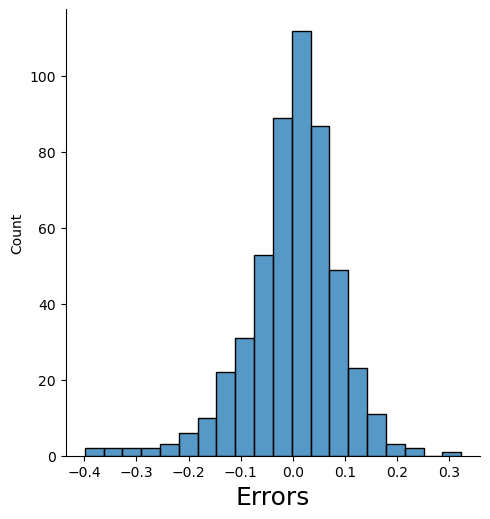

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.displot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### **Error terms seems uniform and centered around 0**

## Making Predictions

In [54]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['windspeed', 'hum', 'temp', 'cnt']

scaler = MinMaxScaler()

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [55]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_monday,weekday_saturday,weekday_sunday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.508750,0.418870,0.516216,0.127854,0.118721,0.146119,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.249189,0.201253,0.188111,0.238702,0.334692,0.324202,0.354034,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.682487,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
y_test = df_test.pop('cnt')
X_test = df_test
# Creating test for rfe here
X_test_2 = df_test

In [57]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [58]:
# Excluding columns ['weekday_sunday', 'holiday', 'mnth_February', 'mnth_June', 'weekday_wednesday', 'weekday_thursday',
#                         'mnth_August', 'mnth_July', 'mnth_October', 'mnth_November', 'mnth_December']
X_test = df_test[['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'weekday_monday', 'weekday_saturday', 'weekday_tuesday',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_misty',
       'weathersit_snowy', 'mnth_January', 'mnth_March', 'mnth_May',
       'mnth_September']]
# Adding constant variable to test dataframe
X_test_2 = sm.add_constant(X_test)
X_test_2.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'weekday_monday', 'weekday_saturday', 'weekday_tuesday',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_misty',
       'weathersit_snowy', 'mnth_January', 'mnth_March', 'mnth_May',
       'mnth_September'],
      dtype='object')

In [59]:
y_pred_without_rfe = lr_4.predict(X_test_2)

## Model Evaulation

Text(0, 0.5, 'y_pred')

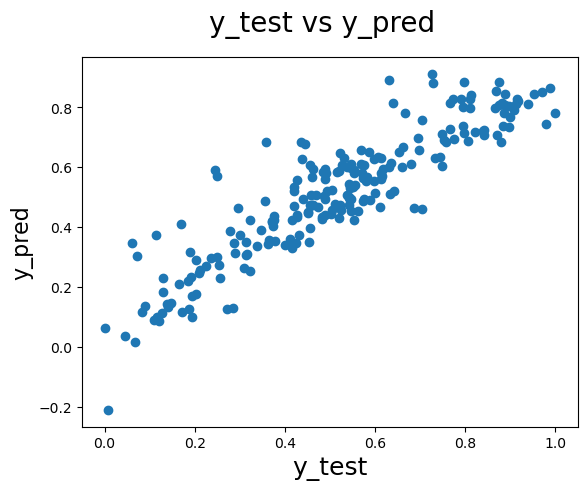

In [60]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_without_rfe)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

## Model using RFE

In [61]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_monday', False, 11),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', True, 1),
 ('weekday_thursday', False, 14),
 ('weekday_tuesday', False, 12),
 ('weekday_wednesday', False, 15),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', False, 3),
 ('weathersit_misty', True, 1),
 ('weathersit_snowy', True, 1),
 ('mnth_August', False, 10),
 ('mnth_December', False, 7),
 ('mnth_February', False, 8),
 ('mnth_January', False, 5),
 ('mnth_July', True, 1),
 ('mnth_June', False, 16),
 ('mnth_March', False, 17),
 ('mnth_May', False, 9),
 ('mnth_November', False, 6),
 ('mnth_October', False, 13),
 ('mnth_September', False, 2)]

In [64]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'weekday_saturday', 'weekday_sunday', 'season_spring',
       'weathersit_misty', 'weathersit_snowy', 'mnth_July'],
      dtype='object')

In [65]:
X_train.columns[~rfe.support_]

Index(['weekday_monday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September'],
      dtype='object')

In [66]:
X_train_rfe = X_train[cols]

import statsmodels.api as sm
X_train_rfe_sm = sm.add_constant(X_train_rfe)


In [67]:
lm_rfe = sm.OLS(y_train, X_train_rfe_sm).fit()

In [68]:
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          5.60e-185
Time:                        16:01:27   Log-Likelihood:                 493.57
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2790      0.024     11.428      0.000       0.231       0.327
yr                   0.2325      0.008     27.807      0.000       0.216       0.249
holiday              0.0098      0.022      0.452      0.651      -0.033       0.053
workingday           0.0998      0.009     10.605      0.000       0.081       0.118
temp                 0.4178      0.026     16.133      0.000       0.367       0.469
hum                 -0.1074      0.038     -2.814      0.005      -0.182      -0.032
windspeed           -0.1832      0.026     -6.994      0.000      -0.235      -0.132
weekday_saturday     0.1116      0.012      9.635      0.000       0.089       0.134
weekday_sunday       0.0578      0.012      4.747      0.000       0.034       0.082
season_spring       -0.1490      0.012    -12.102      0.000      -0.173      -0.125
weathersit_misty    -0.0650      0.011     -6.029      0.000      -0.086      -0.044
weathersit_snowy    -0.2472      0.027     -9.088      0.000      -0.301      -0.194
mnth_July           -0.0888      0.017     -5.115      0.000      -0.123      -0.055
==============================================================================
Omnibus:                       48.967   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.590
Skew:                          -0.526   Prob(JB):                     9.67e-25
Kurtosis:                       5.024   Cond. No.                     1.36e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.85e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
# Lets drop insignificant holiday feature
X_train_rfe_new = X_train_rfe.drop(["holiday"], axis = 1)

In [70]:
X_train_rfe_sm_new = sm.add_constant(X_train_rfe_new)

In [71]:
lm_rfe_2 = sm.OLS(y_train, X_train_rfe_sm_new).fit()

In [72]:
lm_rfe_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          5.60e-185
Time:                        16:01:27   Log-Likelihood:                 493.57
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2888      0.039      7.366      0.000       0.212       0.366
yr                   0.2325      0.008     27.807      0.000       0.216       0.249
workingday           0.0899      0.026      3.404      0.001       0.038       0.142
temp                 0.4178      0.026     16.133      0.000       0.367       0.469
hum                 -0.1074      0.038     -2.814      0.005      -0.182      -0.032
windspeed           -0.1832      0.026     -6.994      0.000      -0.235      -0.132
weekday_saturday     0.1017      0.028      3.639      0.000       0.047       0.157
weekday_sunday       0.0479      0.028      1.707      0.088      -0.007       0.103
season_spring       -0.1490      0.012    -12.102      0.000      -0.173      -0.125
weathersit_misty    -0.0650      0.011     -6.029      0.000      -0.086      -0.044
weathersit_snowy    -0.2472      0.027     -9.088      0.000      -0.301      -0.194
mnth_July           -0.0888      0.017     -5.115      0.000      -0.123      -0.055
==============================================================================
Omnibus:                       48.967   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.590
Skew:                          -0.526   Prob(JB):                     9.67e-25
Kurtosis:                       5.024   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.13
1,workingday,16.32
2,temp,12.52
4,windspeed,4.47
5,weekday_saturday,4.40
6,weekday_sunday,4.30
8,weathersit_misty,2.18
0,yr,2.06
7,season_spring,1.97
10,mnth_July,1.36


Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

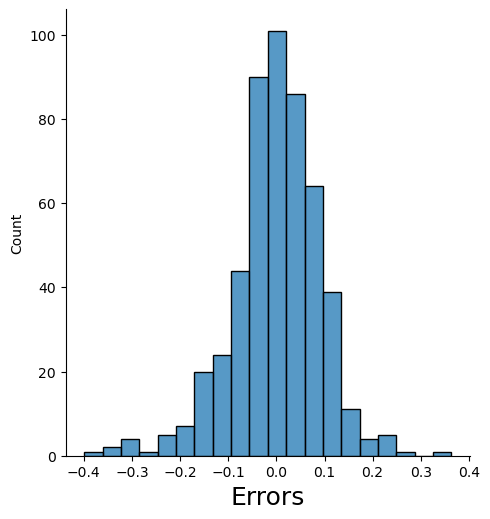

In [74]:
# Residual analysis of RFE model 
y_train_rfe = lm_rfe_2.predict(X_train_rfe_sm_new)

# Plot the histogram of the error terms
fig = plt.figure()
sns.displot((y_train - y_train_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [75]:
df_test.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_misty',
       'weathersit_snowy', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September'],
      dtype='object')

In [76]:
X_test_rfe = df_test[['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'weekday_saturday', 'weekday_sunday', 'season_spring',
       'weathersit_misty', 'weathersit_snowy', 'mnth_July']]


In [77]:
X_test_rfe_sm = sm.add_constant(X_test_rfe)
X_test_rfe_sm.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'weekday_saturday', 'weekday_sunday', 'season_spring',
       'weathersit_misty', 'weathersit_snowy', 'mnth_July'],
      dtype='object')

In [78]:
y_pred_with_rfe = lm_rfe_2.predict(X_test_rfe_sm)

Text(0, 0.5, 'y_pred')

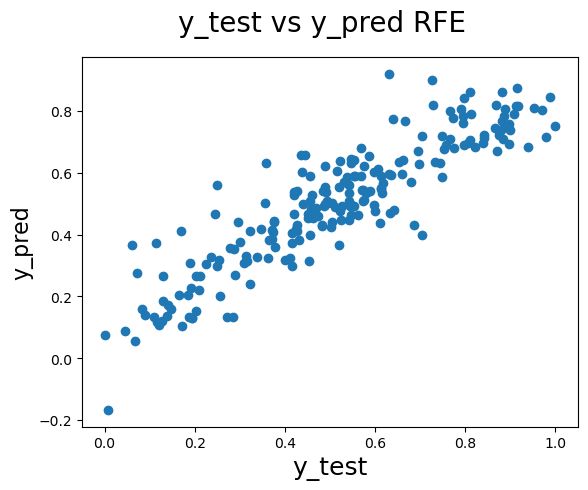

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_with_rfe)
fig.suptitle('y_test vs y_pred RFE', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

## Final Model Results both with and without RFE

In [80]:
lr_4.params

const               0.239702
yr                  0.232617
workingday          0.056834
temp                0.485779
hum                -0.148370
windspeed          -0.182527
weekday_monday     -0.021092
weekday_saturday    0.060039
weekday_tuesday    -0.015504
season_spring      -0.053516
season_summer       0.051255
season_winter       0.103480
weathersit_misty   -0.058141
weathersit_snowy   -0.253146
mnth_January       -0.028242
mnth_March          0.022664
mnth_May            0.026031
mnth_September      0.092849
dtype: float64

In [81]:
lm_rfe_2.params

const               0.288830
yr                  0.232512
workingday          0.089933
temp                0.417826
hum                -0.107422
windspeed          -0.183238
weekday_saturday    0.101738
weekday_sunday      0.047949
season_spring      -0.148974
weathersit_misty   -0.065001
weathersit_snowy   -0.247232
mnth_July          -0.088842
dtype: float64

In [82]:
print(r2_score(y_test, y_pred_without_rfe))
print(r2_score(y_test, y_pred_with_rfe))

0.8175783496843466
0.8037672953255921
